# IRIS - Connection I
---
![Concatenate Layer](https://github.com/DrKAI/image/blob/main/Concatenate%20Layer.png?raw=true)

In [2]:
import numpy as np
import pandas as pd

import tensorflow as tf
from tensorflow import keras

from sklearn.datasets import load_iris

## 데이터 불러오기

- iris.feature_names를 이용하여 판다스 데이터 프레임 만들기!

In [2]:
iris = load_iris()

x = iris.data
y = iris.target

In [3]:
df_x = pd.DataFrame(x, columns=iris.feature_names)
df_x.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


## train set, test set 구분하기

In [4]:
from sklearn.model_selection import train_test_split

In [5]:
train_x, test_x, train_y, test_y = train_test_split(df_x, y, test_size=0.2, random_state=2021)

In [6]:
train_x.shape, train_y.shape, test_x.shape, test_y.shape

((120, 4), (120,), (30, 4), (30,))

## **length끼리, width끼리**

In [7]:
print(df_x.columns)

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)'],
      dtype='object')


In [8]:
tr_x_l = train_x.loc[:, ['sepal length (cm)', 'petal length (cm)'] ]
tr_x_w = train_x.loc[:, ['sepal width (cm)', 'petal width (cm)'] ]

In [9]:
tr_x_l.shape, tr_x_w.shape

((120, 2), (120, 2))

In [10]:
te_x_l = test_x.loc[:, ['sepal length (cm)', 'petal length (cm)'] ]
te_x_w = test_x.loc[:, ['sepal width (cm)', 'petal width (cm)'] ]

## One-hot Encoding

In [11]:
from tensorflow.keras.utils import to_categorical

In [12]:
train_y = to_categorical(train_y, 3)
test_y = to_categorical(test_y, 3)


In [13]:
train_y.shape

(120, 3)

## Modeling : multi-input & Concatenate layer

In [14]:
from tensorflow.keras.backend import clear_session
from tensorflow.keras.models import Model

from tensorflow.keras.layers import Input, Dense, Concatenate
from tensorflow.keras.activations import relu, softmax

from tensorflow.keras.losses import categorical_crossentropy
from tensorflow.keras.optimizers import Adam

from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.utils import plot_model

In [15]:
# 1. 세션 클리어
clear_session()

# 2. 레이어 사슬처럼 엮기 : input 2개!
il_l = Input( shape=(2,) )
hl_l = Dense(2, activation=relu)(il_l)

il_w = Input( shape=(2,) )
hl_w = Dense(2, activation=relu)(il_w)

cl = Concatenate()([hl_l, hl_w])
ol = Dense(3, activation=softmax)(cl)

# 3. 모델 시작과 끝 지정
model = Model([il_l, il_w], ol)

# 4. 모델 컴파일
model.compile(loss=categorical_crossentropy, metrics=['accuracy'],
              optimizer=Adam())

## 모델 시각화

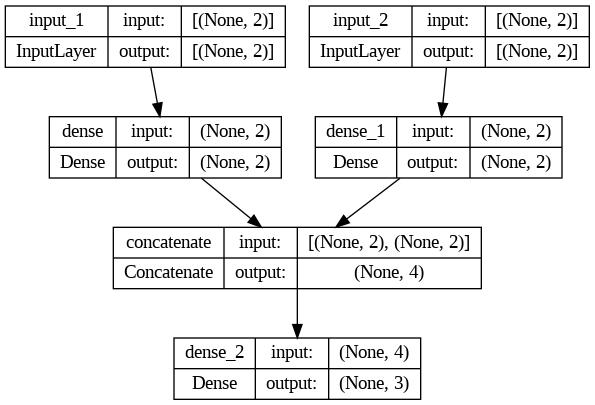

In [16]:
plot_model(model, show_shapes=True)

## 학습 시켜보기!

In [17]:
es = EarlyStopping(monitor='val_loss',
                   min_delta=0,
                   patience=30,
                   verbose=1,
                   restore_best_weights=True)

In [18]:
model.fit([tr_x_l, tr_x_w], train_y, validation_split=0.15,
          epochs=1000, verbose=1, callbacks=[es])

Epoch 1/1000
4/4 [==============================] - 1s 84ms/step - loss: 3.2197 - accuracy: 0.3333 - val_loss: 3.1835 - val_accuracy: 0.3333
Epoch 2/1000
4/4 [==============================] - 0s 11ms/step - loss: 3.1362 - accuracy: 0.3333 - val_loss: 3.0993 - val_accuracy: 0.3333
Epoch 3/1000
4/4 [==============================] - 0s 12ms/step - loss: 3.0515 - accuracy: 0.3333 - val_loss: 3.0189 - val_accuracy: 0.3333
Epoch 4/1000
4/4 [==============================] - 0s 15ms/step - loss: 2.9747 - accuracy: 0.3333 - val_loss: 2.9404 - val_accuracy: 0.3333
Epoch 5/1000
4/4 [==============================] - 0s 13ms/step - loss: 2.9010 - accuracy: 0.3333 - val_loss: 2.8588 - val_accuracy: 0.3333
Epoch 6/1000
4/4 [==============================] - 0s 12ms/step - loss: 2.8352 - accuracy: 0.3333 - val_loss: 2.7814 - val_accuracy: 0.3333
Epoch 7/1000
4/4 [==============================] - 0s 12ms/step - loss: 2.7680 - accuracy: 0.3333 - val_loss: 2.7122 - val_accuracy: 0.3333
Epoch 8/1000


In [20]:
model.evaluate([te_x_l, te_x_w], test_y)

1/1 [==============================] - 0s 39ms/step - loss: 0.1575 - accuracy: 0.9667


[0.15746690332889557, 0.9666666388511658]

---
---
---
---
---

# IRIS - Connection I practice

- 위의 코드를 **그대로** 따라서 코드 작성하기!

## 데이터 불러오기

- iris.feature_names를 이용하여 판다스 데이터 프레임 만들기!

In [45]:
iris = load_iris()

x = iris.data
y = iris.target

In [46]:
x.shape, y.shape

((150, 4), (150,))

In [47]:
df_x = pd.DataFrame(x, columns=iris.feature_names)
df_x.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


## train set, test set 구분하기

In [48]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [49]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df_x,y, test_size=0.2)
X_train, X_val, y_train, y_val = train_test_split(X_train,y_train, test_size=0.1)

In [50]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((108, 4), (30, 4), (108,), (30,))

## **length끼리, width끼리**

In [51]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [52]:
len_X_tr = X_train.loc[:, ['sepal length (cm)','petal length (cm)']]
wid_X_tr = X_train.loc[:, ['sepal width (cm)','petal width (cm)']]

len_X_val = X_val.loc[:, ['sepal length (cm)','petal length (cm)']]
wid_X_val= X_val.loc[:, ['sepal width (cm)','petal width (cm)']]

## One-hot Encoding

In [53]:
from tensorflow.keras.utils import to_categorical
y_len = len(np.unique(y_train))
y_train = to_categorical(y_train, y_len)
y_val = to_categorical(y_val, y_len)

## Modeling : multi-input & Concatenate layer

In [54]:
import tensorflow as tf
from tensorflow.keras.layers import Dense, Input, Concatenate
from tensorflow.keras.models import Model
from tensorflow.keras.utils import plot_model

In [55]:
X_train.shape, y_train.shape

((108, 4), (108, 3))

In [56]:
df_x.columns

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)'],
      dtype='object')

In [57]:
tf.keras.backend.clear_session()

L_il = Input(shape=(2,))
L_hl1 = Dense(32, activation='relu')(L_il)
L_hl2 = Dense(32, activation='relu')(L_hl1)

W_il = Input(shape=(2,))
W_hl1 = Dense(32, activation='relu')(W_il)
W_hl2 = Dense(32, activation='relu')(W_hl1)

C_hl = Concatenate()([L_hl2, W_hl2])
ol = Dense(3,activation='softmax')(C_hl)

model = Model([L_il, W_il] , ol)

model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')

In [58]:
from tensorflow.keras.callbacks import EarlyStopping
es =  EarlyStopping(monitor='val_loss',
                    min_delta=0,
                    patience=7,
                    verbose=1,
                    restore_best_weights=True)
history = model.fit([len_X_tr, wid_X_tr], y_train, validation_data=([len_X_val, wid_X_val], y_val), callbacks=[es], verbose=1, epochs=50)

Epoch 1/50
4/4 [==============================] - 45s 115ms/step - loss: 1.0899 - accuracy: 0.3241 - val_loss: 0.9544 - val_accuracy: 0.5000
Epoch 2/50
4/4 [==============================] - 0s 23ms/step - loss: 0.9953 - accuracy: 0.5278 - val_loss: 0.8992 - val_accuracy: 0.8333
Epoch 3/50
4/4 [==============================] - 0s 22ms/step - loss: 0.9271 - accuracy: 0.6481 - val_loss: 0.8600 - val_accuracy: 0.8333
Epoch 4/50
4/4 [==============================] - 0s 25ms/step - loss: 0.8710 - accuracy: 0.6481 - val_loss: 0.8221 - val_accuracy: 0.9167
Epoch 5/50
4/4 [==============================] - 0s 17ms/step - loss: 0.8211 - accuracy: 0.7500 - val_loss: 0.7843 - val_accuracy: 0.9167
Epoch 6/50
4/4 [==============================] - 0s 18ms/step - loss: 0.7770 - accuracy: 0.8056 - val_loss: 0.7392 - val_accuracy: 0.9167
Epoch 7/50
4/4 [==============================] - 0s 17ms/step - loss: 0.7367 - accuracy: 0.8426 - val_loss: 0.7000 - val_accuracy: 1.0000
Epoch 8/50
4/4 [=========

## 모델 시각화

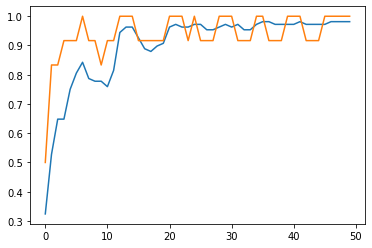

In [59]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.show()

## 학습 시켜보기!

In [62]:
te_x_l = X_test.loc[:, ['sepal length (cm)', 'petal length (cm)'] ]
te_x_w = X_test.loc[:, ['sepal width (cm)', 'petal width (cm)'] ]

In [64]:
y_pred = model.predict([te_x_l,te_x_w])

1/1 [==============================] - 0s 100ms/step


In [70]:
from sklearn.metrics import *
accuracy_score(y_test, y_pred.argmax(axis=1))

1.0